In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

Svm Classifier has accuracy of 99.7431506849315 % 


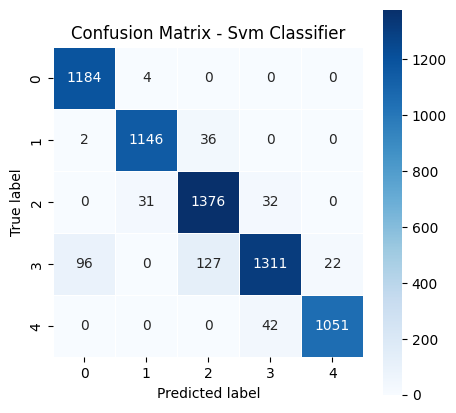

Decision tree Classifier has accuracy of 99.24174843889384 % 


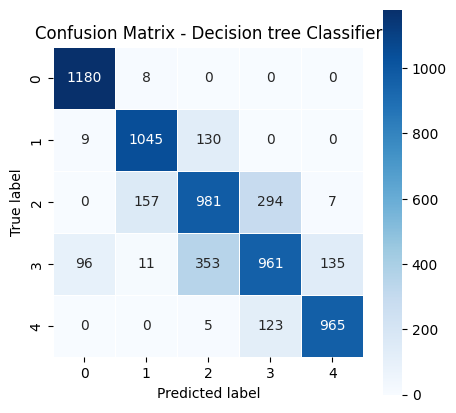

Random Forest Classifier has accuracy of 99.54607353608715 % 


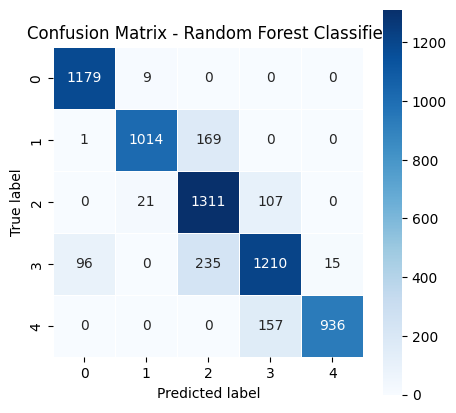

Naive Bayes Classifier has accuracy of 96.6286799620133 % 


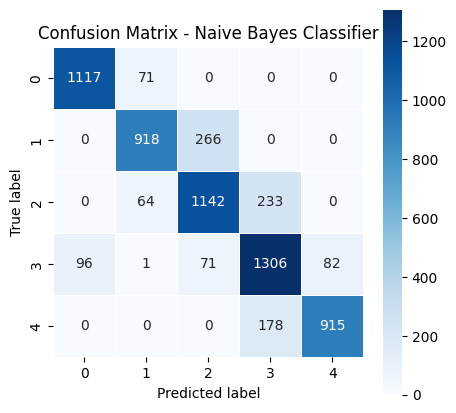

Knn Classifier has accuracy of 99.60282436010591 % 


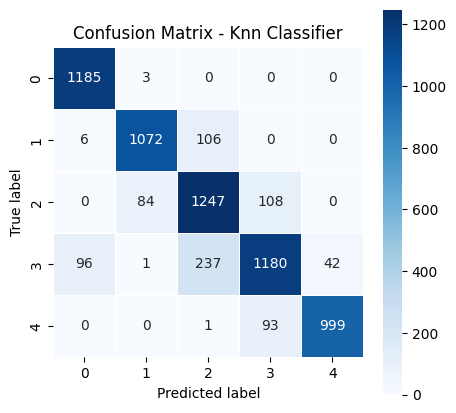

In [2]:
class Model:

    def __init__(self):
        self.name = ''
        path = 'dataset/depressionDataset.csv'
        df = pd.read_csv(path)
        df = df[['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'class']]

        # Handling Missing Data
        df['q1'] = df['q1'].fillna(df['q1'].mode()[0])
        df['q2'] = df['q2'].fillna(df['q2'].mode()[0])
        df['q3'] = df['q3'].fillna(df['q3'].mode()[0])
        df['q4'] = df['q4'].fillna(df['q4'].mode()[0])
        df['q5'] = df['q5'].fillna(df['q5'].mode()[0])
        df['q6'] = df['q6'].fillna(df['q6'].mode()[0])
        df['q7'] = df['q7'].fillna(df['q7'].mode()[0])
        df['q8'] = df['q8'].fillna(df['q8'].mode()[0])
        df['q9'] = df['q9'].fillna(df['q9'].mode()[0])
        df['q10'] = df['q10'].fillna(df['q10'].mode()[0])
        df['class'] = df['class'].fillna(df['class'].mode()[0])

        self.split_data(df)

    def split_data(self,df):
        x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
        y = df.iloc[:, 10].values
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=24)
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test


    def svm_classifier(self):
        self.name = 'Svm Classifier'
        classifier = SVC()
        model = classifier.fit(self.x_train, self.y_train)

        # Save the trained model as a pickle string.
        saved_model = pickle.dumps(model)

        # Save the model to disk
        with open('svm_model.pkl', 'wb') as output:
            pickle.dump(model, output)

        return model
    

    def decisionTree_classifier(self):
        self.name = 'Decision tree Classifier'
        classifier = DecisionTreeClassifier()
        return classifier.fit(self.x_train,self.y_train)


    def randomforest_classifier(self):
        self.name = 'Random Forest Classifier'
        classifier = RandomForestClassifier()
        return classifier.fit(self.x_train,self.y_train)

    def naiveBayes_classifier(self):
        self.name = 'Naive Bayes Classifier'
        classifier = GaussianNB()
        return classifier.fit(self.x_train,self.y_train)


    def knn_classifier(self):
        self.name = 'Knn Classifier'
        classifier = KNeighborsClassifier()
        return classifier.fit(self.x_train,self.y_train)

    def plot_confusion_matrix(self, model):
        predictions = model.predict(self.x_test)
        cm = confusion_matrix(self.y_test, predictions)

        # Plotting the confusion matrix
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
        plt.title(f'Confusion Matrix - {self.name}')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

    def accuracy(self, model):
        predictions = model.predict(self.x_test)
        cm = confusion_matrix(self.y_test, predictions)
        accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
        print(f"{self.name} has accuracy of {accuracy * 100} % ")
        self.plot_confusion_matrix(model)

if __name__ == '__main__':
    model = Model()
    model.accuracy(model.svm_classifier())
    model.accuracy(model.decisionTree_classifier())
    model.accuracy(model.randomforest_classifier())
    model.accuracy(model.naiveBayes_classifier())
    model.accuracy(model.knn_classifier())

In [ ]:
# Load the model from disk
with open('svm_model.pkl', 'rb') as input:
	loaded_model = pickle.load(input)